<a href="https://colab.research.google.com/github/Sazonovasfa/Project-Icarus/blob/main/ProjectIcarus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastdtw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Dont run this
!pip install dtw-python

In [ ]:
#file reading code :P
import urllib.request
#date format: 4 digits, month then year, january 1st would be 0101, january 2nd 0102, december 25 1225, etc.
def download_file(year, date, satellite="wind"):
  baseUrl="https://cdaweb.gsfc.nasa.gov/pub/data/dscovr/h0/mag/"
  fileHeader="dscovr_h0_mag_{}_v01.cdf"
  if(satellite=="wind"):
    baseUrl="https://cdaweb.gsfc.nasa.gov/pub/data/wind/mfi/mfi_h2/"
    fileHeader="wi_h2_mfi_{}_v04.cdf" 
  if(satellite=="ion"):
    baseUrl="https://cdaweb.gsfc.nasa.gov/pub/data/wind/swe/swe_h1/";
    fileHeader="wi_h1_swe_{}_v01.cdf"
  fileName=fileHeader.replace("{}", str(year)+str(date))
  print("{}{}/{}".format(baseUrl, str(year), fileName))
  urllib.request.urlretrieve("{}{}/{}".format(baseUrl, str(year), fileName), fileName)
  return "/content/"+fileName


In [ ]:
import pandas as pd
import numpy as np
import xarray as xr
import sys 

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

Read Datasets

In [ ]:
!pip install cdflib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 1.1 MB/s 


#START

In [ ]:
import datetime
import time
def epoch_to_unix(year, month, day, epoch):
  date_time = datetime.datetime(year, month, day, 0, 0)
  return epoch+(time.mktime(date_time.timetuple())*1000)

In [ ]:
import cdflib
s=download_file(2022, "0101", "dscovr")
s2=download_file(2022, "0101", "wind")
cdf = cdflib.CDF(s)
cdf2=cdflib.CDF(s2)
print(cdf.cdf_info()['zVariables'])
print(cdf2.cdf_info()['zVariables'])
print(cdf['B1GSE'].shape)
d_GSE=cdf['B1GSE']
w_GSE=cdf2['BGSE']
d_Time=cdf['Time1_PB5'][:, 2]
w_Time=cdf2['Time_PB5'][:, 2]

print(d_Time.shape)
print(w_Time.shape)

https://cdaweb.gsfc.nasa.gov/pub/data/dscovr/h0/mag/2022/dscovr_h0_mag_20220101_v01.cdf
https://cdaweb.gsfc.nasa.gov/pub/data/wind/mfi/mfi_h2/2022/wi_h2_mfi_20220101_v04.cdf
['Epoch1', 'Time1_PB5', 'NUM1_PTS', 'B1F1', 'B1SDF1', 'B1GSE', 'B1SDGSE', 'B1RTN', 'B1SDRTN', 'RANGE1', 'FLAG1', 'ZERO', 'SENS', 'label_time', 'format_time', 'unit_time', 'label_bgse', 'label_bsdgse', 'label_brtn', 'label_bsdrtn']
['Epoch', 'Time_PB5', 'BF1', 'BGSM', 'BGSE', 'RANGE', 'SPC_MODE', 'MAG_MODE', 'Epoch1', 'Time1_PB5', 'NUM1_PTS_O', 'ZERO1_O', 'SENS1_O', 'AMPL1_O', 'ORTH1_O', 'PAYLD1_O', 'FLAG1_O', 'NUM1_PTS_I', 'ZERO1_I', 'SENS1_I', 'AMPL1_I', 'ORTH1_I', 'PAYLD1_I', 'FLAG1_I', 'label_time', 'format_time', 'unit_time', 'label_bgsm', 'label_bgse', 'cartesian']
(86400, 3)


AttributeError: ignored

In [ ]:
#Dynamic time warping lets hope this fucking works lmao
#from dtw import *
#alignment=dtw(w_Time, d_Time)
import fastdtw
from scipy.spatial.distance import euclidean
w_GSE_to_time={}
d_GSE_to_time={}


distance, path=fastdtw.fastdtw(w_GSE, d_GSE, dist=euclidean)
# def dtw(s, t, window):
#     n, m = len(s), len(t)
#     w = np.max([window, abs(n-m)])
#     dtw_matrix = np.zeros((n+1, m+1))
    
#     for i in range(n+1):
#         for j in range(m+1):
#             dtw_matrix[i, j] = np.inf
#     dtw_matrix[0, 0] = 0
    
#     for i in range(1, n+1):
#         for j in range(np.max([1, i-w]), np.min([m, i+w])+1):
#             dtw_matrix[i, j] = 0
    
#     for i in range(1, n+1):
#         for j in range(np.max([1, i-w]), np.min([m, i+w])+1):
#             cost = abs(s[i-1] - t[j-1])
#             # take last min from a square box
#             last_min = np.min([dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1]])
#             dtw_matrix[i, j] = cost + last_min
#     return dtw_matrix


In [ ]:
print(w_GSE.shape)

(925803, 3)


In [ ]:
print(d_GSE.shape)

(86400, 3)


In [ ]:
print(path[-100:])

[(925703, 86300), (925704, 86301), (925705, 86302), (925706, 86303), (925707, 86304), (925708, 86305), (925709, 86306), (925710, 86307), (925711, 86308), (925712, 86309), (925713, 86310), (925714, 86311), (925715, 86312), (925716, 86313), (925717, 86314), (925718, 86315), (925719, 86316), (925720, 86317), (925721, 86318), (925722, 86319), (925723, 86320), (925724, 86321), (925725, 86322), (925726, 86323), (925727, 86324), (925728, 86325), (925729, 86326), (925730, 86327), (925731, 86328), (925732, 86329), (925733, 86330), (925734, 86331), (925735, 86332), (925736, 86333), (925737, 86334), (925738, 86335), (925739, 86336), (925740, 86337), (925741, 86338), (925742, 86339), (925743, 86340), (925744, 86341), (925745, 86342), (925746, 86343), (925747, 86344), (925748, 86345), (925749, 86346), (925750, 86347), (925751, 86348), (925752, 86349), (925753, 86350), (925754, 86351), (925755, 86352), (925756, 86353), (925757, 86354), (925758, 86355), (925759, 86356), (925760, 86357), (925761, 8635

[86399110 86399202 86399294 86399386 86399478 86399570 86399662 86399754
 86399846 86399938]


In [ ]:
pathdict={}

for i in path:
  pathdict[w_Time[i[0]]]=d_Time[i[1]];


In [ ]:
def time_to_unix(time):
  return 0

In [ ]:
print(pathdict)

{500: 78, 1500: 170, 2500: 262, 3500: 354, 4500: 446, 5500: 538, 6500: 630, 7500: 722, 8500: 814, 9500: 906, 10500: 998, 11500: 1090, 12500: 1182, 13500: 1274, 14500: 1366, 15500: 1458, 16500: 1550, 17500: 1642, 18500: 1734, 19500: 1826, 20500: 1918, 21500: 2010, 22500: 2102, 23500: 2194, 24500: 2286, 25500: 2378, 26500: 2470, 27500: 2562, 28500: 2654, 29500: 2746, 30500: 2838, 31500: 2930, 32500: 3022, 33500: 3114, 34500: 3206, 35500: 3298, 36500: 3390, 37500: 3482, 38500: 3574, 39500: 3666, 40500: 3758, 41500: 3850, 42500: 3942, 43500: 4034, 44500: 4126, 45500: 4218, 46500: 4310, 47500: 4402, 48500: 4494, 49500: 4586, 50500: 4678, 51500: 4770, 52500: 4862, 53500: 4954, 54500: 5046, 55500: 5138, 56500: 5230, 57500: 5230, 58500: 5230, 59500: 5230, 60500: 5230, 61500: 5230, 62500: 5230, 63500: 5230, 64500: 5230, 65500: 5230, 66500: 5322, 67500: 5414, 68500: 5506, 69500: 5598, 70500: 5690, 71500: 5782, 72500: 5874, 73500: 5966, 74500: 6058, 75500: 6150, 76500: 6150, 77500: 6150, 78500: 6

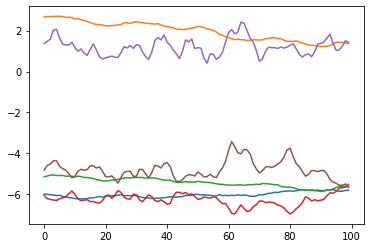

In [ ]:
import matplotlib.pyplot as plt
plt.plot(w_GSE[:100])
plt.plot(d_GSE[:100])

plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!tar -xf /content/ncei_order_2022-10-02T19_15_00.387Z.tar.gz

In [ ]:
from os import listdir
import netCDF4 as nc
import gzip
import shutil
nclist=[]
parent="/content/archive-item-472507/satellite/dscovr/data/2022/09/"
allfiles=listdir(parent)
for i in allfiles:
  if(i.endswith(".gz")):
    with gzip.open(parent+i, 'rb') as f_in:
        with open(parent+i.replace(".gz", ""), 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)
    ds=nc.Dataset(parent+i.replace(".gz", ""));
    nclist.append(ds)

In [ ]:
!pip install gunzip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!gunzip /content/archive-item-472507/satellite/dscovr/data/2022/09/oe_fc0_dscovr_s20220902000000_e20220902235959_p20220904021438_pub.nc.gz

In [ ]:
print(i.variables['time'][:])

[1.664e+12 1.664e+12 1.664e+12 ... 1.664e+12 1.664e+12 1.664e+12]


In [ ]:
ds=nclist[0]
Y_vals=np.array([])
time_vals=np.array([])
for i in nclist:
  time_vals=np.concatenate((time_vals, np.array(i.variables['time'][:])))
  print(i.variables['a_d_value_a'][:].shape)
  A=i.variables['a_d_value_a'][:]+1024*i.variables['mux_range_a'][:]
  B=i.variables['a_d_value_b'][:]+1024*i.variables['mux_range_b'][:]
  C=i.variables['a_d_value_c'][:]+1024*i.variables['mux_range_c'][:]
  Y_vals=np.concatenate((Y_vals, A+B+C))



(468233,)
(479148,)
(478477,)
(481236,)
(483362,)
(482873,)
(465971,)
(477188,)
(477472,)
(480795,)
(481678,)
(477608,)
(483523,)
(437879,)
(475527,)
(474053,)
(469282,)
(477263,)
(461882,)
(478461,)
(478478,)
(479874,)
(478773,)
(445917,)
(477768,)
(478178,)
(481312,)


In [ ]:
print(Y_vals.shape)

(12812211,)


In [ ]:
wi=download_file(2022, "0101", "ion")
wicdf=cdflib.CDF(wi)
print(wicdf.cdf_info()['zVariables'])
ndt=wicdf['Proton_Np_nonlin']
wdt=wicdf['Proton_W_nonlin']
vdt=wicdf['Proton_V_nonlin']
ep=wicdf['Epoch']
print(ep[50]-ep[49])
print(ndt.shape)
print(wdt.shape)
print(vdt.shape)

https://cdaweb.gsfc.nasa.gov/pub/data/wind/swe/swe_h1/2022/wi_h1_swe_20220101_v01.cdf
['fit_flag', 'Epoch', 'year', 'doy', 'Proton_V_nonlin', 'Proton_sigmaV_nonlin', 'Proton_VX_nonlin', 'Proton_sigmaVX_nonlin', 'Proton_VY_nonlin', 'Proton_sigmaVY_nonlin', 'Proton_VZ_nonlin', 'Proton_sigmaVZ_nonlin', 'Proton_W_nonlin', 'Proton_sigmaW_nonlin', 'Proton_Wperp_nonlin', 'Proton_sigmaWperp_nonlin', 'Proton_Wpar_nonlin', 'Proton_sigmaWpar_nonlin', 'EW_flowangle', 'SigmaEW_flowangle', 'NS_flowangle', 'SigmaNS_flowangle', 'Proton_Np_nonlin', 'Proton_sigmaNp_nonlin', 'Alpha_V_nonlin', 'Alpha_sigmaV_nonlin', 'Alpha_VX_nonlin', 'Alpha_sigmaVX_nonlin', 'Alpha_VY_nonlin', 'Alpha_sigmaVY_nonlin', 'Alpha_VZ_nonlin', 'Alpha_sigmaVZ_nonlin', 'Alpha_W_nonlin', 'Alpha_sigmaW_nonlin', 'Alpha_Wperp_nonlin', 'Alpha_sigmaWperp_nonlin', 'Alpha_Wpar_nonlin', 'Alpha_sigmaWpar_nonlin', 'Alpha_Na_nonlin', 'Alpha_sigmaNa_nonlin', 'ChisQ_DOF_nonlin', 'Peak_doy', 'sigmaPeak_doy', 'Proton_V_moment', 'Proton_VX_moment',

In [ ]:
mappedtimes=[]
for epoch in ep:
  ind=np.argmin(np.abs(np.fromiter(pathdict.keys(), dtype=float)-epoch))
  mappedtimes.append(pathdict[np.fromiter(pathdict.keys(), dtype=float)[ind]])
y_values=np.concatenate(ndt, wdt, vdt, axis=1)



#MAIN

In [ ]:
path=None
distance=None

In [ ]:
mappedtimes=None

In [83]:
import cdflib
import fastdtw
from scipy.spatial.distance import euclidean
from os import listdir
import netCDF4 as nc
import gzip
import shutil

x_data=[]
y_data=[]


for j in range(1, 2):
  istr=str(j)
  if(j<10):
    istr="0"+istr
  datestr="01"+istr
  s=download_file(2022, datestr, "dscovr")
  s2=download_file(2022, datestr, "wind")
  cdf = cdflib.CDF(s)
  cdf2=cdflib.CDF(s2)
  d_GSE=cdf['B1GSE']
  w_GSE=cdf2['BGSE']
  d_Time=cdf['Epoch1']
  w_Time=cdf2['Epoch']
  distance, path=fastdtw.fastdtw(w_GSE, d_GSE, dist=euclidean)
  pathdict={}
  for i in path:
    pathdict[w_Time[i[0]]]=d_Time[i[1]];
  nclist=[]
  parent="/content/archive-item-472555/satellite/dscovr/data/2022/01/"
  allfiles=listdir(parent)
  for i in allfiles:
    if(i.endswith(".gz")):
      with gzip.open(parent+i, 'rb') as f_in:
          with open(parent+i.replace(".gz", ""), 'wb') as f_out:
              shutil.copyfileobj(f_in, f_out)
      ds=nc.Dataset(parent+i.replace(".gz", ""));
      nclist.append(ds)
  ds=nclist[j]
  Y_vals=np.array([])
  time_vals=np.array([])
  for i in nclist:
    time_vals=np.concatenate((time_vals, np.array(i.variables['time'][:])))
    #print(i.variables['a_d_value_a'][:].shape)
    A=i.variables['a_d_value_a'][:]+1024*i.variables['mux_range_a'][:]
    B=i.variables['a_d_value_b'][:]+1024*i.variables['mux_range_b'][:]
    C=i.variables['a_d_value_c'][:]+1024*i.variables['mux_range_c'][:]
    Y_vals=np.concatenate((Y_vals, A+B+C))
  wi=download_file(2022, datestr, "ion")
  wicdf=cdflib.CDF(wi)
  #print(wicdf.cdf_info()['zVariables'])
  ndt=np.array(wicdf['Proton_Np_nonlin'])
  wdt=np.array(wicdf['Proton_W_nonlin'])
  vdt=np.array(wicdf['Proton_V_nonlin'])
  print(Y_vals)
  ep=wicdf['Epoch']
  y_values=np.concatenate((ndt.reshape(ndt.shape[0], 1), wdt.reshape(wdt.shape[0], 1), vdt.reshape(vdt.shape[0], 1)), axis=1)
  print(time_vals[0])
  print(time_vals[-1])
  mappedtimes=[]
  for epoch in ep:
    ind=np.argmin(np.abs(np.fromiter(pathdict.keys(), dtype=float)-epoch))
    mappedtimes.append(pathdict[np.fromiter(pathdict.keys(), dtype=float)[ind]])
  x_values=[]
  print(cdf['Time1_PB5'][:, 2])
  for i in mappedtimes:
    print(cdf['Time1_PB5'][:, 2][np.argmin(np.abs(d_Time-i))])
    ind=np.argmin(np.abs(time_vals-epoch_to_unix(2022, 1, j, cdf['Time1_PB5'][:, 2][np.argmin(np.abs(d_Time-epoch))])))
    print(ind)
    print(epoch_to_unix(2022, 1, j, cdf['Time1_PB5'][:, 2][np.argmin(np.abs(d_Time-i))]))
    x_values.append(Y_vals[ind])
  if(j==1):
    x_data=np.array(x_values)
    y_data=np.array(y_values)
    continue;
  x_data=np.concatenate((x_data, np.array(x_values)))
  y_data=np.concatenate((y_data, np.array(y_values)))
  

https://cdaweb.gsfc.nasa.gov/pub/data/dscovr/h0/mag/2022/dscovr_h0_mag_20220101_v01.cdf
https://cdaweb.gsfc.nasa.gov/pub/data/wind/mfi/mfi_h2/2022/wi_h2_mfi_20220101_v04.cdf
https://cdaweb.gsfc.nasa.gov/pub/data/wind/swe/swe_h1/2022/wi_h1_swe_20220101_v01.cdf
[6481. 6745. 6856. ... 7140. 7087. 6980.]
1641254400028.0
1642204799906.0
[     500     1500     2500 ... 86397500 86398500 86399500]
1286500
5061704
1640996486500.0
2037500
5061704
1640997237500.0
2037500
5061704
1640997237500.0
2037500
5061704
1640997237500.0
2037500
5061704
1640997237500.0
2046500
5061704
1640997246500.0
2046500
5061704
1640997246500.0
2506500
5061704
1640997706500.0
2860500
5061704
1640998060500.0
3012500
5061704
1640998212500.0
3064500
5061704
1640998264500.0
3436500
5061704
1640998636500.0
3436500
5061704
1640998636500.0
3438500
5061704
1640998638500.0
3440500
5061704
1640998640500.0
3440500
5061704
1640998640500.0
3440500
5061704
1640998640500.0
3575500
5061704
1640998775500.0
3828500
5061704
1640999028500.

In [84]:
x_copy=np.copy(x_data)
y_copy=np.copy(y_data)

In [87]:
from keras.layers import *
from keras.models import Sequential
from keras.losses import MeanSquaredError
nmodel=Sequential()
nmodel.add(Dense(64))
nmodel.add(Dropout(0.1))
nmodel.add(Dense(128, activation="relu"))
nmodel.add(Dense(64, activation="relu"))
nmodel.add(Dense(32, activation="relu"))
nmodel.add(Dense(3))
#nmodel.compile(optimizer='rmsprop', loss=MeanSquaredError(), metrics=['acc'])
x_data=x_data.reshape(x_data.shape[0], 1)
print(x_data)
print(y_data)

[[7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 [7013.]
 

In [88]:
nmodel.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['acc'])
nmodel.fit(x_data, y_data, validation_split=0.1, epochs=10)

Epoch 1/10
17/17 [==============================] - 1s 12ms/step - loss: 199306080.0000 - acc: 0.3474 - val_loss: 328068864.0000 - val_acc: 0.1034
Epoch 2/10
17/17 [==============================] - 0s 3ms/step - loss: 198266832.0000 - acc: 0.0384 - val_loss: 328979456.0000 - val_acc: 0.1034
Epoch 3/10
17/17 [==============================] - 0s 4ms/step - loss: 197755424.0000 - acc: 0.0787 - val_loss: 326601952.0000 - val_acc: 0.1034
Epoch 4/10
17/17 [==============================] - 0s 4ms/step - loss: 198109040.0000 - acc: 0.4261 - val_loss: 321256384.0000 - val_acc: 0.1034
Epoch 5/10
17/17 [==============================] - 0s 4ms/step - loss: 198145392.0000 - acc: 0.0384 - val_loss: 327033920.0000 - val_acc: 0.1034
Epoch 6/10
17/17 [==============================] - 0s 4ms/step - loss: 197851936.0000 - acc: 0.0461 - val_loss: 325809184.0000 - val_acc: 0.1034
Epoch 7/10
17/17 [==============================] - 0s 4ms/step - loss: 197588304.0000 - acc: 0.0403 - val_loss: 327938976.

In [ ]:
#Time mapping
import keras.backend as K
def correlation_coefficient_loss(y_true, y_pred):
    x = y_true
    y = y_pred
    mx = K.mean(x)
    my = K.mean(y)
    xm, ym = x-mx, y-my

    r_num = K.sum(tf.multiply(xm,ym))
    r_den = K.sqrt(tf.multiply(K.sum(K.square(xm)), K.sum(K.square(ym))))
    r = r_num / r_den
    r = K.maximum(K.minimum(r, 1.0), -1.0)
    return 1 - K.square(r)
def loss_func(t_1, t_2):
  w_vec=K.tf.gather(K.constant(w_GSE), K.tf.where(K.constant(w_Time)-K.cast(t_1,'float32')==0)[0][0])
  d_vec=K.tf.gather(K.constant(d_GSE), K.argmin(K.abs(K.constant(d_Time)-K.cast(t_2, 'float32')), axis=0))
  return correlation_coefficient_loss(w_vec, d_vec)


In [ ]:
from keras.layers import *;

Dtmodel = tf.keras.Sequential([
  layers.Dense(70, activation="relu"),
  layers.Dense(40, activation="relu"),  
  layers.Dense(1, activation="relu")                              
])
Dtmodel.compile(optimizer='adam', loss=loss_func)
Dtmodel.fit(w_Time, w_Time, epochs=2)

Epoch 1/2


ValueError: ignored

In [ ]:
from keras.layers import *;
loss =  tf.keras.losses.MeanSquaredError()
Dtmodel = tf.keras.Sequential([
  layers.Dense(70, activation="relu"),
  layers.Dense(40, activation="relu"),  
  layers.Dense(1, activation="relu")                              
])
Dtmodel.compile(optimizer='adam', loss=loss_func)
Dtmodel.fit(w_Time, w_Time, epochs=2)

Epoch 1/2


ValueError: ignored

In [ ]:
# Read nc dataset
nc_dataset_name = 'whatever_data_here.nc'
ds_xr = xr.open_dataset(nc_dataset_name)
dscoverData = ds_xr.to_dataframe()
dscoverData.head()

FileNotFoundError: ignored

In [ ]:
!pip install cdflib

In [ ]:
# Read CDF dataset
import cdflib

cdf_dataset_name = ''
cdf_pc = pycdf.CDF(cdf_dataset_name)

print(cdf_pc)
print('----')
print(cdf_pc.attrs)

In [ ]:

carrington_model = tf.keras.Sequential([
  layers.Dense(70, activation="relu"),
  layers.Dense(40, activation="relu"),  
  layers.Dense(2)                              
])

In [ ]:
spam_model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
spam_model.fit(spam_features, label_numbers, validation_split=0.2, verbose=1, epochs=400)

In [ ]:
probability_model = tf.keras.Sequential([spam_model, tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(spam_features)

Predictions vs Actual

